## Часть 1
Напишите скрипт, который скачивает все данные с выборов губернатора СПб 2019г для всех избирательных участков. 

Входная точка [по ссылке](http://notelections.online/region/region/st-petersburg?action=show&root=1&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217417&type=222). Затем нужно перейти на сайты территориальных избирательных комиссий. Результаты нужно сохранить в  `cvs`-файл, `sqlite` базе данных или `parquet`-файле. В итоге должна получиться таблица с полями:
- название ТИК (территориальная избирательная комиссия, некоторое объединение избирательных участков на определенной территории)
- номер УИК (избирательный участок)
- 14 стандартных полей из итогового протокола

Скрипт должен быть в отдельном `*.py` файле или в отдельном `jupyter`-ноутбуке. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('C:/Users/kvanc/session/document_classification/data.csv')

In [14]:
df.head()

,tik,uik,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,Территориальная избирательная комиссия №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120
1,Территориальная избирательная комиссия №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46
2,Территориальная избирательная комиссия №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96
3,Территориальная избирательная комиссия №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71
4,Территориальная избирательная комиссия №1,УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82


### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

### 1. явка (%) по всем ТИК

In [15]:
feat_1 = "Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования"
feat_2 = "Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования"
feat_3 = "Число избирателей, внесенных в список избирателей на момент окончания голосования"

df["Всего бюллетеней"] = df[feat_1] + df[feat_2]
df["Явка"] = df["Всего бюллетеней"] / df[feat_3]

In [16]:
df.sort_values("Явка", ascending=False, inplace=True)
df.head()

,tik,uik,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего бюллетеней,Явка
972,Территориальная избирательная комиссия №15,УИК №2293,203,300,151,52,97,52,151,10,193,0,0,20,142,31,203,1.0
1458,Территориальная избирательная комиссия №22,УИК №408,201,500,120,81,299,81,120,9,192,0,0,17,140,35,201,1.0
1095,Территориальная избирательная комиссия №17,УИК №2284,235,500,235,0,265,0,235,11,224,0,0,17,165,42,235,1.0
1377,Территориальная избирательная комиссия №21,УИК №2343,76,200,63,13,124,13,63,1,75,0,0,8,64,3,76,1.0
1969,Территориальная избирательная комиссия №29,УИК №2178,126,500,126,0,374,0,126,0,126,0,0,12,114,0,126,1.0


### 2. поиск избирательного участка, на котором кандидат x получил наибольший результат (%)

In [17]:
candidate = 'Амосов Михаил Иванович'
new_col = candidate + '_max_res'
df[new_col] = 0

In [19]:
df.loc[df["Всего бюллетеней"] >= 100, new_col] = round(df[candidate] / df["Всего бюллетеней"], 3)
df

,tik,uik,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего бюллетеней,Явка,Амосов Михаил Иванович_max_res
972,Территориальная избирательная комиссия №15,УИК №2293,203,300,151,52,97,52,151,10,193,0,0,20,142,31,203,1.000000,0.099
1458,Территориальная избирательная комиссия №22,УИК №408,201,500,120,81,299,81,120,9,192,0,0,17,140,35,201,1.000000,0.085
1095,Территориальная избирательная комиссия №17,УИК №2284,235,500,235,0,265,0,235,11,224,0,0,17,165,42,235,1.000000,0.072
1377,Территориальная избирательная комиссия №21,УИК №2343,76,200,63,13,124,13,63,1,75,0,0,8,64,3,76,1.000000,0.000
1969,Территориальная избирательная комиссия №29,УИК №2178,126,500,126,0,374,0,126,0,126,0,0,12,114,0,126,1.000000,0.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Территориальная избирательная комиссия №5,УИК №1424,1814,1700,320,1,1379,1,320,6,315,0,0,45,225,45,321,0.176957,0.140
475,Территориальная избирательная комиссия №6,УИК №1139,1848,1500,317,3,1180,3,317,10,310,0,0,53,186,71,320,0.173160,0.166
1756,Территориальная избирательная комиссия №26,УИК №1215,1959,2000,331,8,1661,8,331,9,330,0,0,62,194,74,339,0.173047,0.183
647,Территориальная избирательная комиссия №10,УИК №203,859,800,143,1,656,1,143,7,137,0,0,37,71,29,144,0.167637,0.257


### 3. поиск ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [20]:
(df.groupby("tik")["Явка"].max() - df.groupby("tik")["Явка"].min()).sort_values()

tik
Территориальная избирательная комиссия №25    0.158715
Территориальная избирательная комиссия №12    0.328265
Территориальная избирательная комиссия №14    0.338567
Территориальная избирательная комиссия №6     0.419000
Территориальная избирательная комиссия №9     0.487510
Территориальная избирательная комиссия №10    0.555662
Территориальная избирательная комиссия №7     0.634323
Территориальная избирательная комиссия №3     0.659203
Территориальная избирательная комиссия №15    0.707452
Территориальная избирательная комиссия №24    0.716071
Территориальная избирательная комиссия №16    0.727179
Территориальная избирательная комиссия №18    0.741768
Территориальная избирательная комиссия №13    0.745692
Территориальная избирательная комиссия №30    0.746789
Территориальная избирательная комиссия №1     0.770264
Территориальная избирательная комиссия №29    0.788658
Территориальная избирательная комиссия №22    0.790130
Территориальная избирательная комиссия №23    0.792554
Террит

### 4. дисперсия по явке для каждого ТИК (учитывается УИК)

In [21]:
df.groupby("tik")["Явка"].var().sort_values()

tik
Территориальная избирательная комиссия №25    0.000844
Территориальная избирательная комиссия №6     0.002043
Территориальная избирательная комиссия №14    0.003146
Территориальная избирательная комиссия №12    0.003220
Территориальная избирательная комиссия №7     0.006799
Территориальная избирательная комиссия №3     0.007303
Территориальная избирательная комиссия №10    0.007428
Территориальная избирательная комиссия №16    0.011306
Территориальная избирательная комиссия №9     0.011464
Территориальная избирательная комиссия №5     0.013666
Территориальная избирательная комиссия №20    0.017360
Территориальная избирательная комиссия №1     0.019176
Территориальная избирательная комиссия №19    0.020498
Территориальная избирательная комиссия №27    0.020655
Территориальная избирательная комиссия №26    0.022018
Территориальная избирательная комиссия №4     0.022297
Территориальная избирательная комиссия №18    0.024045
Территориальная избирательная комиссия №11    0.024049
Террит

### 5. таблица: результат (%) - количество УИК, на которых кандидат получил данный результат

In [23]:
import pprint

In [24]:
counts = df.groupby(new_col).count()['uik']
res = {}

for percent, count in zip(counts.index, counts):
    res[percent] = count

In [28]:
res

{0.0: 15,
 0.007: 1,
 0.009: 3,
 0.013: 1,
 0.014: 1,
 0.015: 1,
 0.019: 1,
 0.023: 2,
 0.024: 2,
 0.032: 1,
 0.034: 1,
 0.036: 1,
 0.037: 5,
 0.039: 2,
 0.04: 3,
 0.043: 1,
 0.044: 1,
 0.045: 1,
 0.046: 1,
 0.047: 2,
 0.048: 2,
 0.05: 1,
 0.051: 3,
 0.053: 4,
 0.054: 1,
 0.055: 3,
 0.056: 3,
 0.057: 1,
 0.058: 3,
 0.059: 2,
 0.06: 4,
 0.061: 3,
 0.062: 2,
 0.063: 1,
 0.064: 2,
 0.065: 3,
 0.066: 3,
 0.067: 5,
 0.068: 4,
 0.069: 3,
 0.07: 4,
 0.071: 4,
 0.072: 3,
 0.073: 3,
 0.074: 2,
 0.075: 3,
 0.076: 3,
 0.077: 6,
 0.078: 3,
 0.079: 4,
 0.08: 4,
 0.081: 8,
 0.082: 2,
 0.083: 6,
 0.084: 6,
 0.085: 11,
 0.086: 11,
 0.087: 6,
 0.088: 1,
 0.089: 5,
 0.09: 7,
 0.091: 3,
 0.092: 14,
 0.093: 5,
 0.094: 5,
 0.095: 12,
 0.096: 10,
 0.097: 4,
 0.098: 10,
 0.099: 8,
 0.1: 7,
 0.101: 12,
 0.102: 8,
 0.103: 11,
 0.104: 5,
 0.105: 6,
 0.106: 8,
 0.107: 7,
 0.108: 9,
 0.109: 7,
 0.11: 14,
 0.111: 16,
 0.112: 5,
 0.113: 13,
 0.114: 10,
 0.115: 12,
 0.116: 8,
 0.117: 9,
 0.118: 8,
 0.119: 16,
 0.12:

### 6. визуализация (явка на УИК  →  результат кандидата)

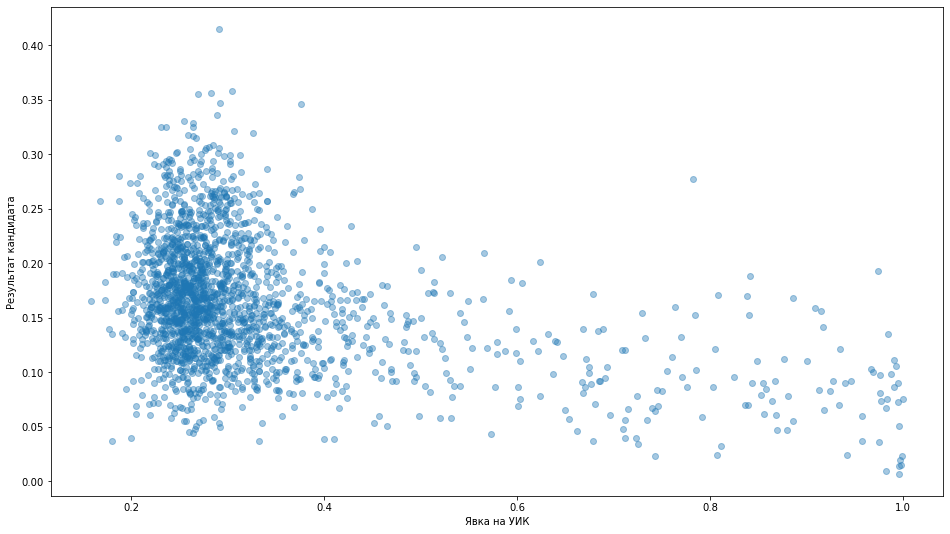

In [29]:
ans = df.loc[df[new_col] != 0].groupby("Явка")[new_col].mean()

plt.figure(figsize=(16, 9))
plt.scatter(ans.index, ans.values, alpha=0.4)
plt.xlabel("Явка на УИК")
plt.ylabel("Результат кандидата")
plt.show()